<a href="https://colab.research.google.com/github/rishi-rg/MACHINE-LEARNING-23CSE301-/blob/main/linear_regression02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Step 2.1: Create dataset
data = {
    'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age':    [35, 39, 25, 60, 27, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male',
               'Female', 'Female', 'Female', 'Female', 'Female']
}
df = pd.DataFrame(data)

# Step 2.2: Encode Gender and drop NaNs (cleaning step)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df = df.dropna()



In [ ]:
print(df.head())
print("\nShape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())


   Weight  Height  Age  Gender
0      79    1.80   35       1
1      69    1.68   39       1
2      73    1.82   25       1
3      95    1.70   60       1
4      82    1.87   27       1

Shape: (10, 4)

Missing values:
 Weight    0
Height    0
Age       0
Gender    0
dtype: int64


In [ ]:
X = df[['Height', 'Age', 'Gender']].values
y = df['Weight'].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Model Coefficients: [32.8353363   0.31729474 14.62311848]
Intercept: -3.0552172392595196
R² Score: -11.252468343750825
MSE: 76.57792714844265


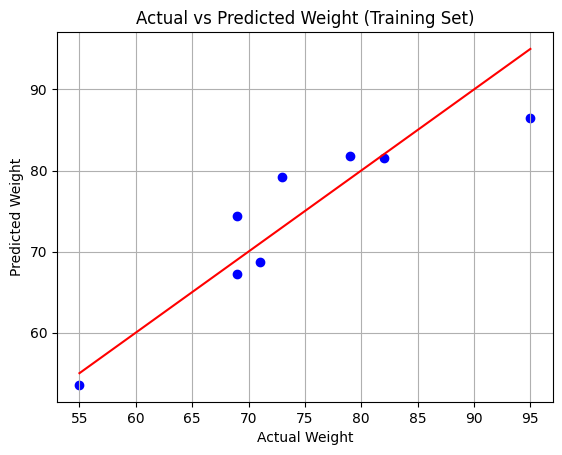

In [ ]:
plt.scatter(y_train, model.predict(X_train), color='blue')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')
plt.title('Actual vs Predicted Weight (Training Set)')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.grid(True)
plt.show()


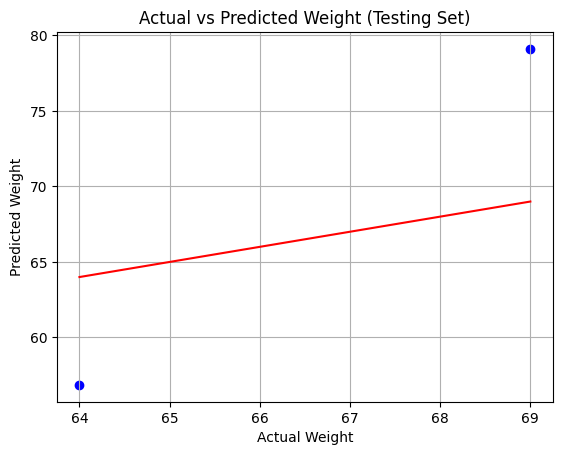

In [ ]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Weight (Testing Set)')
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.grid(True)
plt.show()


/tmp/ipython-input-10-2244537296.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label='Actual', shade=True, color='blue')
/tmp/ipython-input-10-2244537296.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label='Predicted', shade=True, color='orange')


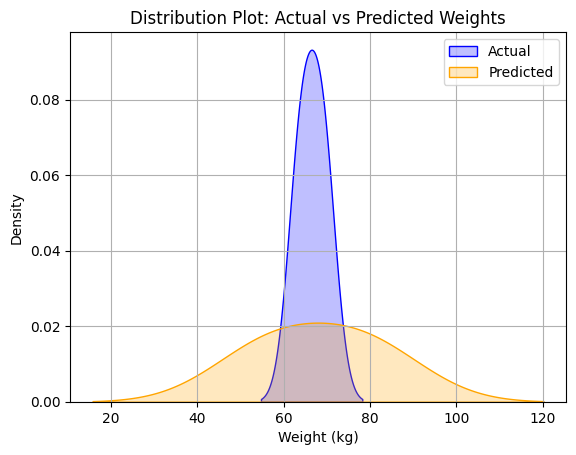

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_test, label='Actual', shade=True, color='blue')
sns.kdeplot(y_pred, label='Predicted', shade=True, color='orange')
plt.title("Distribution Plot: Actual vs Predicted Weights")
plt.xlabel("Weight (kg)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
